# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73917.94 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 100960.37 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 120381.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 132453.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139656.11 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 145803.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 117044.94 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 77609.85 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 109545.22 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 126584.93 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 137179.04 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 142344.22 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 154086.93 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 122784.31 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.32 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 38.13 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 51.29 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.42 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.32 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.44 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.44 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.11 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.16 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.31 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.27 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.42 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.15 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.22 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.49 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.31 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.44 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 29.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.57 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.54 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.50 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.18 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.08 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 37.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.30 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.84 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.46 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.08 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.18 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 32.19 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.90 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.13 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.28 examples/s]

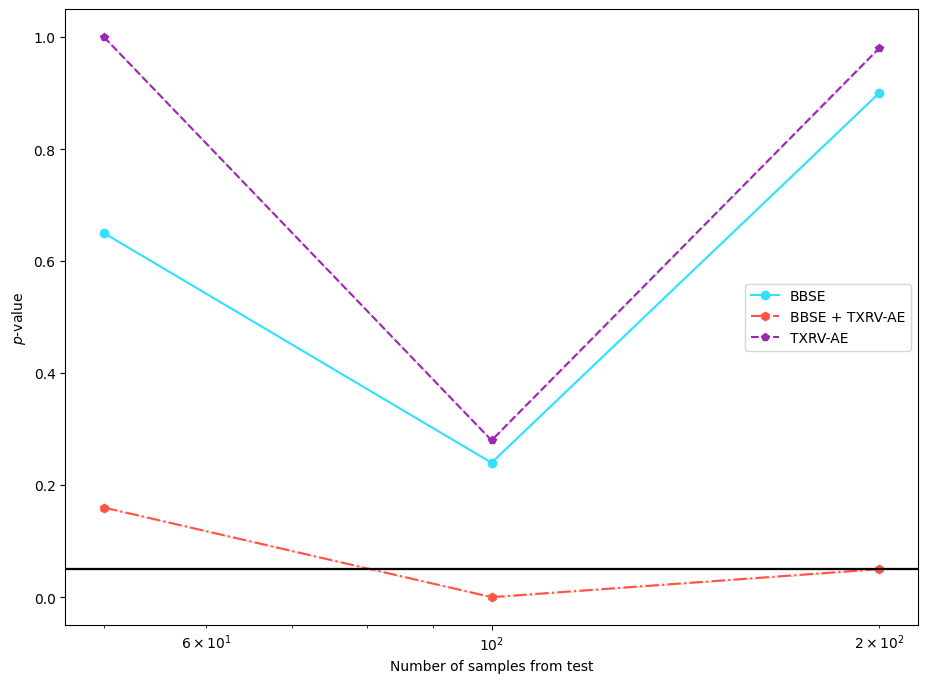

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.24 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.56 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.77 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.17 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.20 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.66 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.51 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.46 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.07 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.91 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.08 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.82 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.11 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.94 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.82 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.82 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.14 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.51 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.88 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.59 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.55 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 33.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.48 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.03 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.45 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 40.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.31 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.94 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.99 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.20 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.66 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.02 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.80 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.29 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.76 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 33.46 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.78 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.37 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.35 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.20 examples/s]

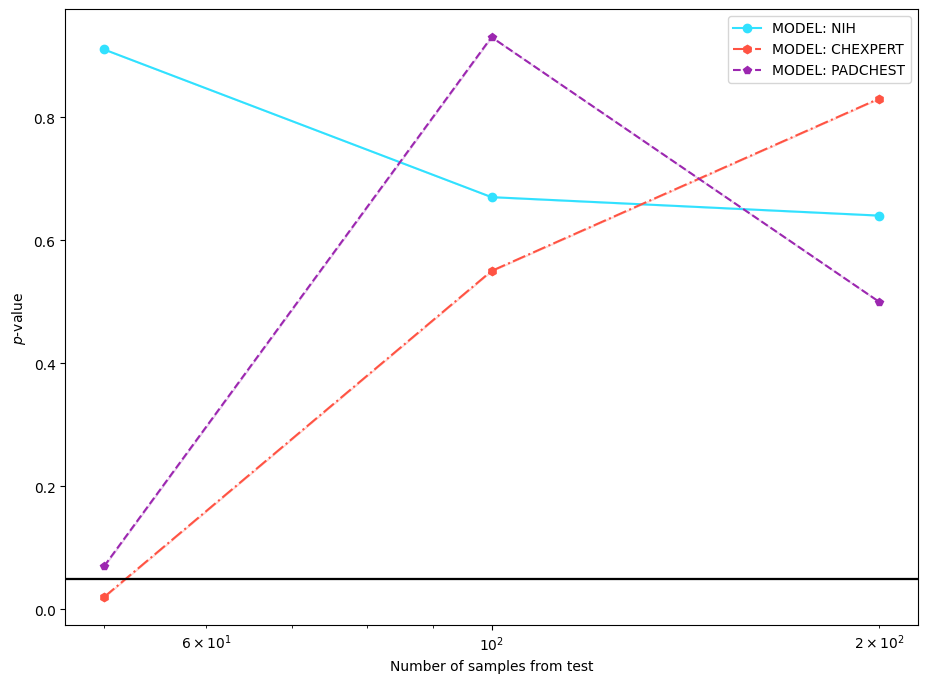

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53088.10 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75781.53 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87549.76 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94934.84 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99464.96 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 103768.10 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 83238.80 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49915.56 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72577.91 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84709.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92564.42 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93966.92 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102494.92 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 80701.30 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.52 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.31 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.56 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.44 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.66 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.72 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 33.30 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.94 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.71 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.96 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.34 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.50 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53675.03 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75195.45 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86580.97 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92557.10 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97092.78 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101983.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 81787.90 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51879.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74062.13 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85602.26 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91599.51 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97556.84 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100608.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 81240.26 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.76 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.66 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.74 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.55 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.51 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.02 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.56 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.63 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 33.44 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.40 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.78 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.38 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 42.57 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50143.57 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68973.14 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 79614.87 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87740.00 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92826.43 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97686.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 77804.18 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50254.23 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72799.71 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84930.23 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92541.46 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96378.66 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100370.19 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 80186.28 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.71 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.49 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.01 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.61 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.98 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.24 examples/s]

Map: 100%|██████████| 100/100 [00:03<00:00, 31.95 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.21 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.53 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.03 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.87 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.01 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 41.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50679.64 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73485.32 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85666.72 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94818.09 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96972.70 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100215.38 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 80926.41 examples/s] 

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53700.88 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 82950.10 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 98823.94 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 113284.32 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 121156.97 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 127816.86 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 95393.78 examples/s] 

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.34 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.68 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.11 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.66 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.59 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.60 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.42 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.69 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.25 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.18 examples/s]

Map: 100%|██████████| 100/100 [00:02<00:00, 33.52 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.68 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.41 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.30 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.06 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 43.35 examples/s]

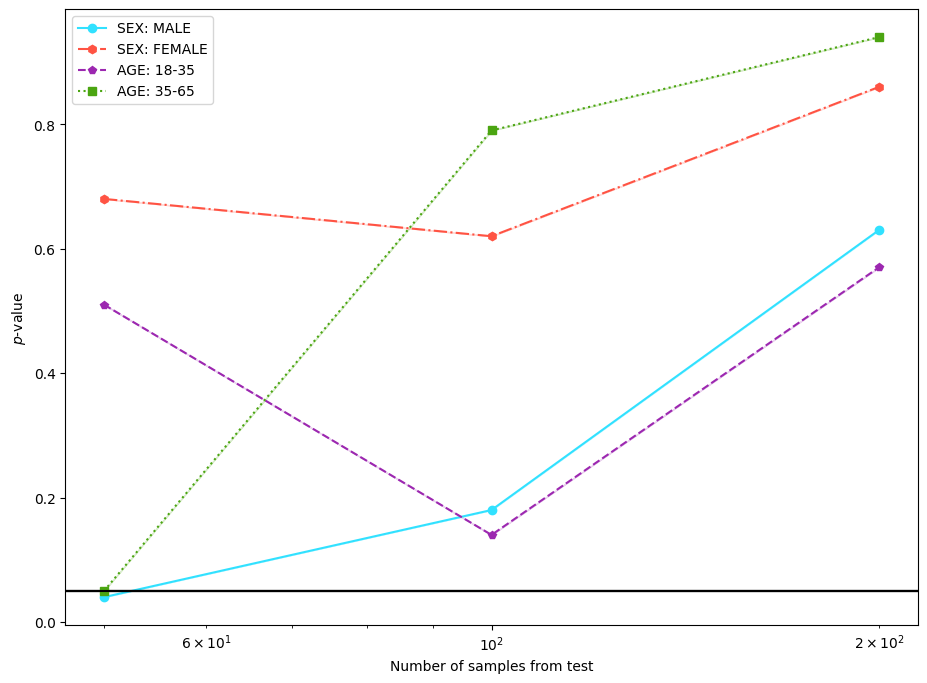

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.62 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.39 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.02 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 45.25 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.37 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.85 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.03 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.13 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 18.00 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.85 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.63 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.75 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.63 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.85 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.32 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.30 examples/s]

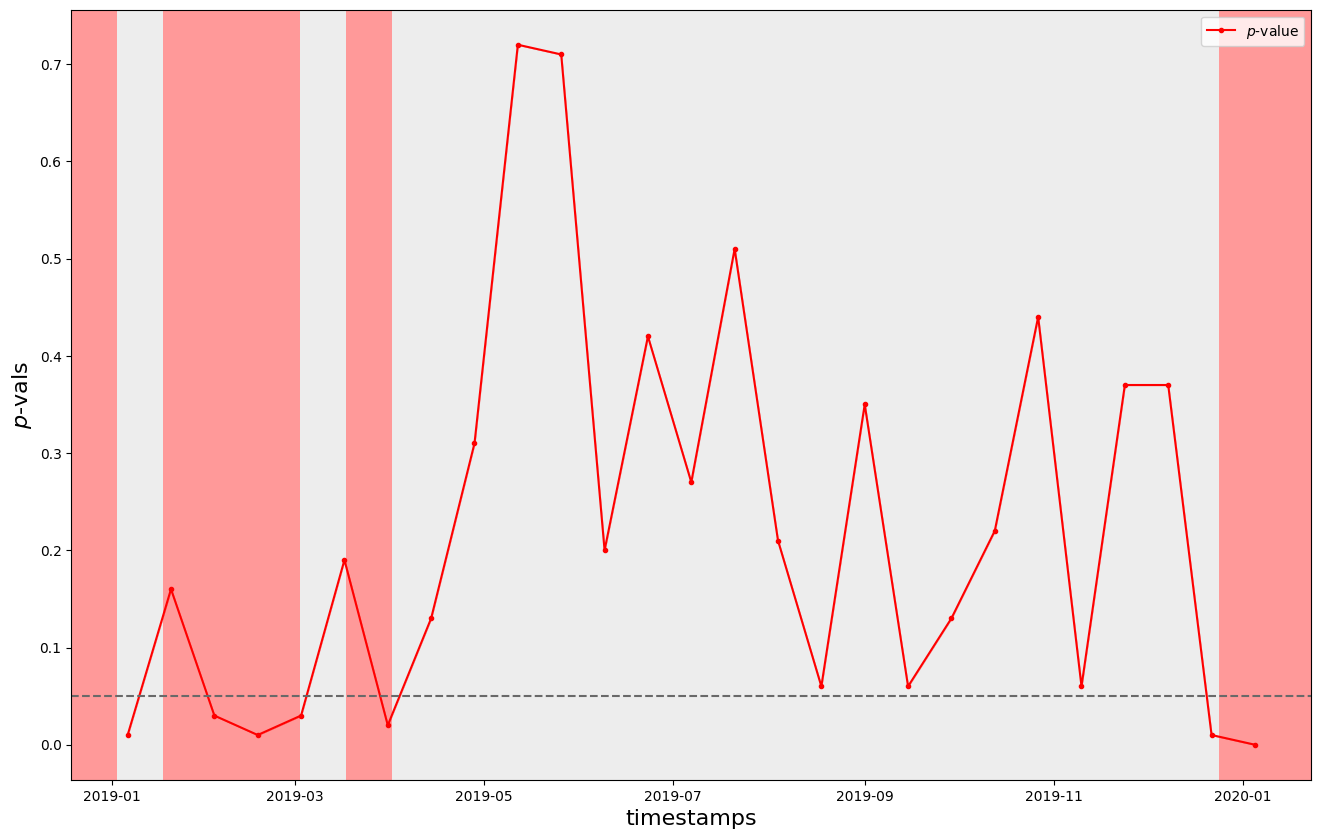

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)